In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
train = pd.read_csv('data\\train.csv')
print(train.shape)
train.head()

(54706, 14)


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [129]:
lines = ['Data Value Counts']
with open('data_description.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')
    for column in ['site_id','laterality','view','age','cancer','biopsy','BIRADS','implant','density','machine_id','difficult_negative_case']:
        print(train[column].value_counts(), file=f)
        print('', file=f)

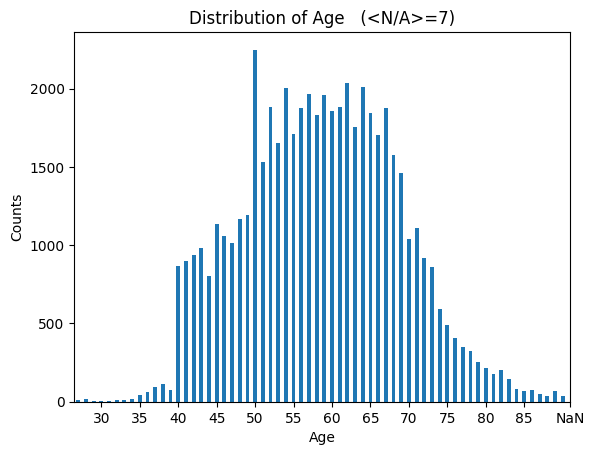

In [130]:
na_s = train.loc[:,'age'].value_counts(sort=False, dropna = False).values[-1]
ax = train.loc[:,'age'][::].sort_values().value_counts(sort=False,dropna=False).plot(kind='bar',
                                                                        rot=0,
                                                                        xlabel='Age',
                                                                        ylabel='Counts',
                                                                        title=f'Distribution of Age   (<N/A>={na_s})')
ticks = ax.xaxis.get_ticklocs()[:63]
ticklabels = [np.int64(np.float64(l.get_text())) for l in ax.xaxis.get_ticklabels()[:63]]
ticks = np.append(ticks,64)
ticklabels = np.append(ticklabels,'NaN')
ax.xaxis.set_ticks(ticks[3:64:5])
ax.xaxis.set_ticklabels(ticklabels[3:64:5])
plt.show()